<a href="https://colab.research.google.com/github/Shamitha018/Pandas/blob/main/O_9_12_2025_Pandas_session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df = pd.read_csv('/content/Visadataset.csv')
visa_df['continent']

,continent
0,Asia
1,Asia
2,Asia
3,Asia
4,Africa
...,...
25475,Asia
25476,Asia
25477,Asia
25478,Asia


In [6]:
con1 = visa_df['continent'] == 'Asia'
con1

,continent
0,True
1,True
2,True
3,True
4,False
...,...
25475,True
25476,True
25477,True
25478,True


In [7]:
con2 = visa_df['case_status']
con2

,case_status
0,Denied
1,Certified
2,Denied
3,Denied
4,Certified
...,...
25475,Certified
25476,Certified
25477,Certified
25478,Certified


In [8]:
con2 = visa_df['case_status'] == 'Certified'
con2

,case_status
0,False
1,True
2,False
3,False
4,True
...,...
25475,True
25476,True
25477,True
25478,True


In [11]:
cert_con = con1 & con2
cert_con

,0
0,False
1,True
2,False
3,False
4,False
...,...
25475,True
25476,True
25477,True
25478,True


In [12]:
len(visa_df[cert_con])

11012

BI VARIATE ANALYSIS

In [14]:
cols = (visa_df['case_status'].unique())
cols #alphabetical order

array(['Denied', 'Certified'], dtype=object)

In [13]:
cols = sorted(visa_df['case_status'].unique())
cols

['Certified', 'Denied']

In [16]:
#from different continents how many ppl are certified
labels = visa_df['continent'].unique()
cert = []
denied = []
for i in labels:
  con1 = visa_df['continent'] == i
  con2 = visa_df['case_status'] == 'Certified'
  con3 = visa_df['case_status'] == 'Denied'
  cert_con = con1 & con2
  den_con = con1 & con3
  cert.append(len(visa_df[cert_con]))
  denied.append(len(visa_df[den_con]))
cols = sorted(visa_df['case_status'].unique())
pd.DataFrame(zip(cert, denied), columns = cols, index = labels)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


CROSS TAB

In [34]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
r1 = pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

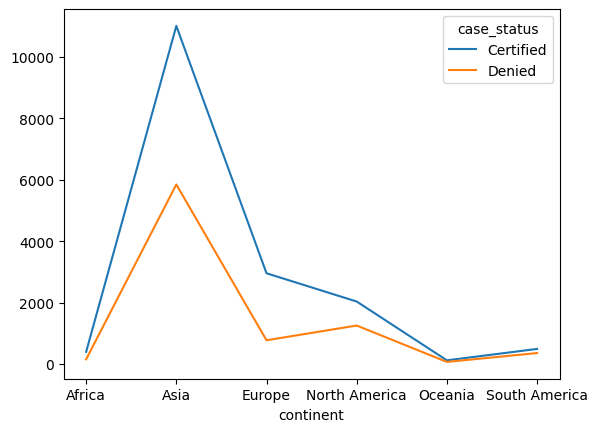

In [35]:
r1.plot()

<Axes: xlabel='continent'>

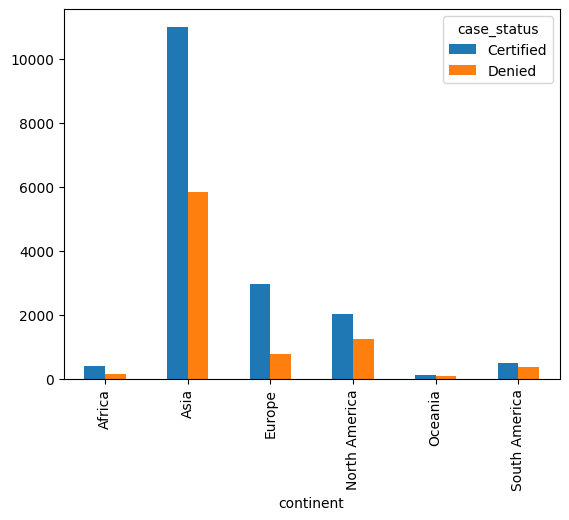

In [39]:
r1.plot(kind='bar')

In [21]:
pd.crosstab(col2,col1)

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [19]:
pd.crosstab(visa_df['continent'], visa_df['case_status'])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [ ]:
r1.plot

In [28]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
col3 = visa_df['education_of_employee']
cols = [col2,col3]
r2 = pd.crosstab(col1, cols)
r2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

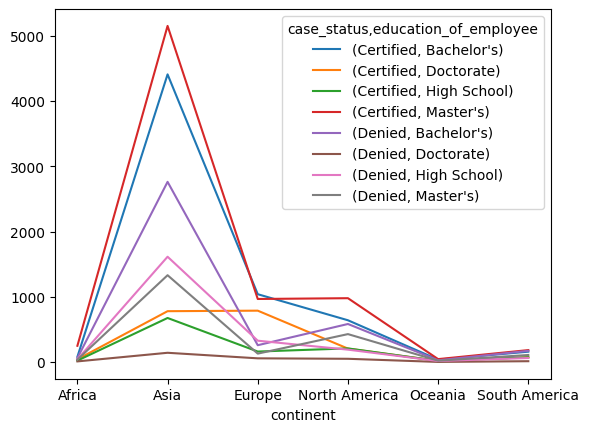

In [32]:
r2.plot()

In [29]:
cols = [col3,col2]
r21 = pd.crosstab(col1, cols)
r21

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

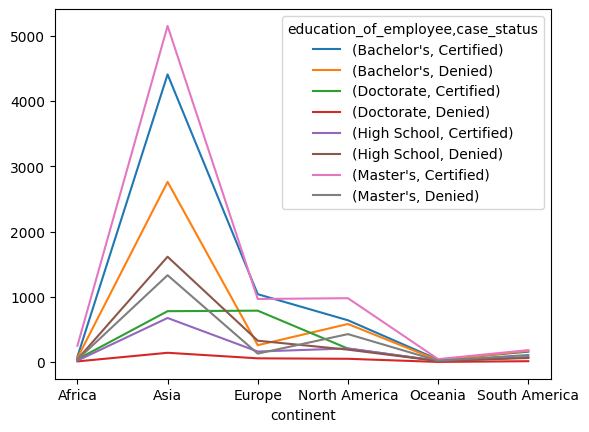

In [31]:
r21.plot()

In [41]:
visa_df.dtypes

,0
case_id,object
continent,object
education_of_employee,object
has_job_experience,object
requires_job_training,object
no_of_employees,int64
yr_of_estab,int64
region_of_employment,object
prevailing_wage,float64
unit_of_wage,object


GROUP BY

In [43]:
visa_df.groupby('education_of_employee').size()

,0
education_of_employee,
Bachelor's,10234
Doctorate,2192
High School,3420
Master's,9634


In [44]:
visa_df.groupby('education_of_employee')['prevailing_wage']

In [45]:
visa_df['prevailing_wage'].mean()

np.float64(74455.81459209183)

In [48]:
bach = visa_df['education_of_employee'] == "Bachelor's"
visa_df[bach]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [49]:
con = visa_df['case_status'] =='Certified'
new_df = visa_df[con]
new_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [50]:
new_df.groupby('continent').size()

,0
continent,
Africa,397
Asia,11012
Europe,2957
North America,2037
Oceania,122
South America,493


In [52]:
con = visa_df['case_status'] =='Denied'
new_df = visa_df[con]
new_df.groupby('continent').size()

,0
continent,
Africa,154
Asia,5849
Europe,775
North America,1255
Oceania,70
South America,359


In [55]:
visa_df['prevailing_wage'].min() #total

2.1367

In [54]:

con = visa_df['continent'] == 'Asia'
new_df = visa_df[con]
new_df['prevailing_wage'].min() #asia's min

3.3188

In [53]:
visa_df.groupby('continent')['prevailing_wage'].min()

,prevailing_wage
continent,
Africa,32.9286
Asia,3.3188
Europe,9.1753
North America,2.1367
Oceania,24.4888
South America,3.0031
